In [108]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EJ1

* tomar 30 muestras de una distribucion bernoulli con parametro p=0.3

(a) estimador plug-in del devio estandar de la distribucion

(b) estimar error estandar via bootstrap

(c) estimar el intervalo de confianza del 95% usando los métodos normal, percentile
bootstrap, basic bootstrap y BCa.


In [109]:
sample = np.random.binomial(1, 0.3, 30)
sample

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0])

In [110]:
def var_pluging(sample):
    return (1 / len(sample)) * np.sum((sample - np.mean(sample)) ** 2)


sd_plugin = np.sqrt(var_pluging(sample))
sd_plugin

0.37267799624996495

In [111]:
def basic_bootstrap(sample, Func, N):
    theta_bootstrap = np.zeros(N)

    for i in range(N):
        sample_bootstrap = np.random.choice(sample, len(sample), replace=True)
        theta_bootstrap[i] = Func(sample_bootstrap)
    return theta_bootstrap

Text(0.5, 0, 'bootstraped standard deviation')

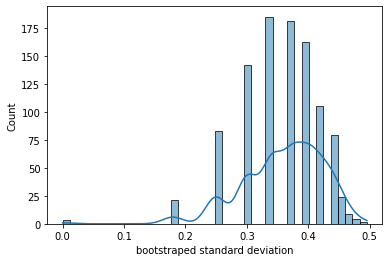

In [112]:
sd_bootstrap = basic_bootstrap(sample, var_pluging, 1000) ** 0.5

sns.histplot(sd_bootstrap, kde=True)
plt.xlabel("bootstraped standard deviation")

In [113]:
standard_error = np.std(sd_bootstrap)
print(
    "standard error: ", standard_error
)  # error estandar del desvio estandard de la muestra

standard error:  0.06595096225016277


In [114]:
# intervalo de confianza por metodo normal, como se puede observar arriba la distribucion en el bootstrap del SD_sample no es normal, va a ser una mala aproximacion.
alpha = 0.05


def normal_approximation_ci(bootstrapped_sample, alpha=0.05):
    z = st.norm.ppf(1 - (alpha / 2))
    lower = sd_plugin - z * standard_error
    upper = sd_plugin + z * standard_error
    return lower, upper


lower, upper = normal_approximation_ci(sd_bootstrap, alpha)
print("intervalo de confianza aproximacion normal: ", lower, " ", upper)

intervalo de confianza aproximacion normal:  0.24341648549388525   0.5019395070060446


In [115]:
def percentile_aproximation_ci(bootstrapped_sample, alpha=0.05):
    lower = np.quantile(bootstrapped_sample, alpha / 2)
    upper = np.quantile(bootstrapped_sample, 1 - (alpha / 2))
    return lower, upper


lower, upper = percentile_aproximation_ci(sd_bootstrap, alpha)
print("intervalo de confianza aproximacion percentil: ", lower, " ", upper)

intervalo de confianza aproximacion percentil:  0.24944382578492943   0.45825756949558394


In [116]:
(sample,)

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0]),)

In [117]:
# basic bootstrap CI AKA bootstrap pivotal CI

basic_bootstrap_CI = st.bootstrap(
    (sample,), np.std, confidence_level=1 - alpha, method="basic"
)
print("intervalo de confianza pivotal ", basic_bootstrap_CI.confidence_interval)

intervalo de confianza pivotal  ConfidenceInterval(low=0.28709842300434596, high=0.5658504989287798)


In [119]:
bca_bootstrap_CI = st.bootstrap(
    (sample,), np.std, confidence_level=1 - alpha, method="bca"
)  # bias corrected and accelerated
print("intervalo de confianza bca ", basic_bootstrap_CI.confidence_interval)

intervalo de confianza bca  ConfidenceInterval(low=0.17950549357115012, high=0.458257569495584)
